In [1]:
# Dependencies and Setup
# API dependencies
import requests
import json

# Pandas dependency
import pandas as pd

# Plotting dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression dependencies
from scipy.stats import linregress

# Import API key
#from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
diversity_raw_df = pd.read_csv("../Resources/Diversity_in_tech_companies.csv")

# Display sample data
diversity_raw_df.head(10)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [3]:
print(diversity_raw_df.shape)
print(diversity_raw_df.info())
print(diversity_raw_df.describe())

(94, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          94 non-null     int64 
 1   Company       94 non-null     object
 2   Female %      94 non-null     int64 
 3   Male %        94 non-null     int64 
 4   % White       94 non-null     int64 
 5   % Asian       94 non-null     object
 6   % Latino      94 non-null     object
 7   % Black       94 non-null     object
 8   % Multi       94 non-null     object
 9   % Other       93 non-null     object
 10  % Undeclared  94 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.2+ KB
None
              Year   Female %     Male %    % White
count    94.000000  94.000000  94.000000  94.000000
mean   2016.106383  35.234043  64.744681  59.393617
std       1.432856   9.446426   9.464065   9.897559
min    2014.000000  16.000000  46.000000  37.000000
25%    2015.000000  29.0000

In [4]:
# Total number of copanies
# Unique companies
print(f"Total Tech companies: {diversity_raw_df.Company.nunique()}")
print(f"Tech companies: {diversity_raw_df.Company.unique()}")

Total Tech companies: 23
Tech companies: ['Yahoo!' 'Google' 'Apple' 'Cisco' 'eBay' 'HP' 'Indiegogo' 'Nvidia' 'Dell'
 'Ingram Micro' 'Intel' 'Groupon' 'Amazon' 'Etsy ' 'Microsoft'
 'Salesforce' 'Pandora' 'Uber' 'Slack' 'AirBnB ' 'Netflix' 'Yelp'
 'Apple (excluding undeclared)']


In [5]:
# Number of companies per year
diversity_raw_df.groupby("Year").Company.nunique()

Year
2014    17
2015    18
2016    19
2017    18
2018    22
Name: Company, dtype: int64

In [6]:
# Number of companies per year
pd.options.display.max_colwidth = 999
diversity_raw_df.groupby("Year").Company.unique()

Year
2014                  [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Salesforce, Pandora, Microsoft]
2015           [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora]
2016     [Yahoo!, Google, Apple, Apple (excluding undeclared), Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2017                                   [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber]
2018    [Yahoo!, Google, Apple, Cisco, eBay, HP, Indiegogo, Nvidia, Dell, Ingram Micro, Intel, Groupon, Amazon, Etsy , Microsoft, Salesforce, Pandora, Uber, Slack, AirBnB , Netflix, Yelp]
Name: Company, dtype: object

## Data cleaning    

In [7]:
# Remove rows with Company name as "Apple (excluding undeclared)" as this is a duplicate of "Apple"
diversity_raw_df = diversity_raw_df[diversity_raw_df.Company != "Apple (excluding undeclared)"]
print(diversity_raw_df.info())
diversity_raw_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          91 non-null     int64 
 1   Company       91 non-null     object
 2   Female %      91 non-null     int64 
 3   Male %        91 non-null     int64 
 4   % White       91 non-null     int64 
 5   % Asian       91 non-null     object
 6   % Latino      91 non-null     object
 7   % Black       91 non-null     object
 8   % Multi       91 non-null     object
 9   % Other       90 non-null     object
 10  % Undeclared  91 non-null     object
dtypes: int64(4), object(7)
memory usage: 8.5+ KB
None


,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-
5,2018,HP,37,63,73,12,8,4,2,<1,-
6,2018,Indiegogo,50,50,58,28,7,4,-,3,-
7,2018,Nvidia,17,83,37,45,3,1,14,<1,-
8,2018,Dell,28,72,69,9,11,10,-,1,-
9,2018,Ingram Micro,31,69,52,14,19,14,1,0,-


In [8]:
# Copy original DataFrame to avoid modifying it in case is needed later
df = diversity_raw_df.copy()
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [9]:
# If it id less than 1%, then change it to 0% (rounding down to 0%)
df.loc[df["% Other"] == "<1", "% Other"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [10]:
# Convert "-" to 0
df.loc[df["% White"] == "-", "% White"] = 0 
df.loc[df["% Asian"] == "-", "% Asian"] = 0
df.loc[df["% Black"] == "-", "% Black"] = 0
df.loc[df["% Latino"] == "-", "% Latino"] = 0
df.loc[df["% Multi"] == "-", "% Multi"] = 0
df.loc[df["% Other"] == "-", "% Other"] = 0
df.loc[df["% Undeclared"] == "-", "% Undeclared"] = 0
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,0
1,2018,Google,31,69,53,36,4,3,4,0,0
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,0,0
4,2018,eBay,40,60,50,39,6,3,1,1,0


In [11]:
# Check the data types
df.dtypes

Year             int64
Company         object
Female %         int64
Male %           int64
% White          int64
% Asian         object
% Latino        object
% Black         object
% Multi         object
% Other         object
% Undeclared    object
dtype: object

In [12]:
# Convert percentage columns to float
df["Female %"] = df["Female %"].astype(float)
df["Male %"] = df["Male %"].astype(float)
df["% White"] = df["% White"].astype(float)
df["% Asian"] = df["% Asian"].astype(float)
df["% Black"] = df["% Black"].astype(float)
df["% Latino"] = df["% Latino"].astype(float)
df["% Multi"] = df["% Multi"].astype(float)
df["% Other"] = df["% Other"].astype(float)
df["% Undeclared"] = df["% Undeclared"].astype(float)

In [13]:
# Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          91 non-null     int64  
 1   Company       91 non-null     object 
 2   Female %      91 non-null     float64
 3   Male %        91 non-null     float64
 4   % White       91 non-null     float64
 5   % Asian       91 non-null     float64
 6   % Latino      91 non-null     float64
 7   % Black       91 non-null     float64
 8   % Multi       91 non-null     float64
 9   % Other       90 non-null     float64
 10  % Undeclared  91 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 8.5+ KB


In [14]:
# Check percentage totals
df["Gender Total %"] = df["Female %"] + df["Male %"] 
df["Diversity Total %"] = df["% White"] + df["% Asian"] + df["% Black"] + df["% Latino"] + df["% Multi"] + df["% Other"] + df["% Undeclared"]
df.head(10)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [15]:
df.to_csv("Diversity_in_tech_companies_plotting.csv")

### Percentage difference from 100% can be attributed to rounding on percentages, or by Multi selecting already counted diversity

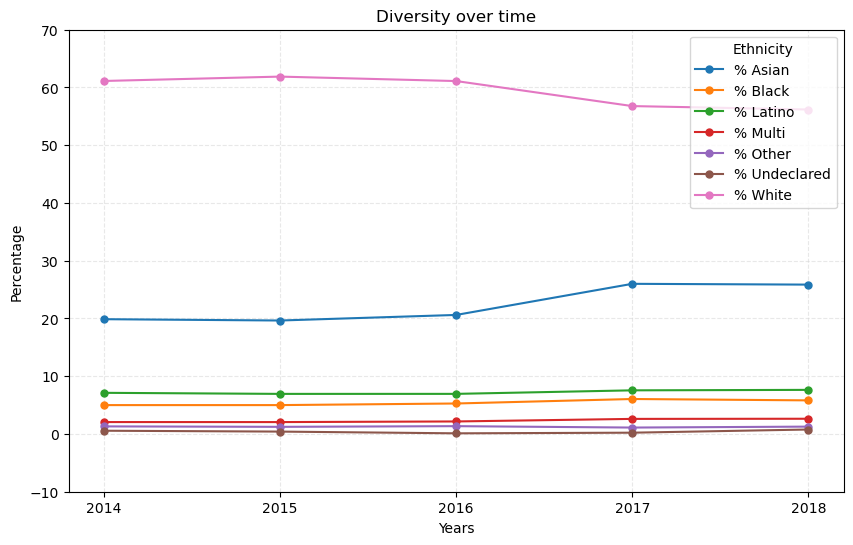

In [16]:
# Plot racial diversity over time
# 1. Get the data
pivot_df = df.pivot_table(index='Year', values=['% White', '% Asian', '% Latino', '% Black', '% Multi', '% Other', '% Undeclared'], aggfunc='mean') 

# 2. Make the canvas
# plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

# 3. Plot the data
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column, marker='o', linestyle='-', markersize=5)

plt.title('Diversity over time')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.xticks(pivot_df.index)
plt.yticks(range(-10, 71, 10))
plt.legend(title='Ethnicity')
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

# 4. Show/Save the plot
plt.show()

The r-value is: 0.12619415936237163


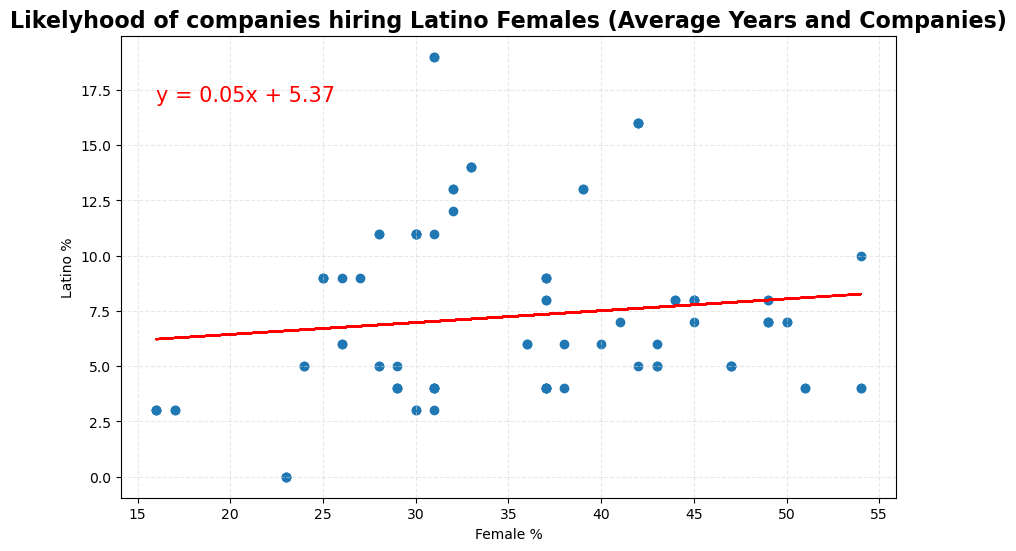

In [17]:
### Likelyhood of companies hiring hispanic women in scatter plot with regression line
# 1. Get the data
x_values = df["Female %"]
y_values = df["% Latino"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
# Calculate the regression line "y values" from the slope and intercept
regress_values = x_values * slope + intercept

# Get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the scatter plot
# Create a scatter plot and plot the regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")

# Annotate the text for the line equation
plt.annotate(line_eq, (16,17), fontsize=15, color="red")
plt.title('Likelyhood of companies hiring Latino Females (Average Years and Companies)', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Female %')
plt.ylabel('Latino %')
# plt.xlim(10, 60)
# plt.ylim(-0.5, 20)
plt.grid(linestyle='--', alpha=0.5, color='lightgray')

print(f"The r-value is: {rvalue}")

# 4. Save/Show the plot
plt.show()

In [18]:
# Define a function to create Linear Regression plots
def plot_linear_regression(gender, race, title, xlabel, ylabel, text_coordinates):
    
    # 1. Get the data
    x_values = df[f"{gender} %"]
    y_values = df[f"% {race}"]

    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2. Make the canvas
    plt.figure(figsize=(10,6))

    # 3. Make the scatter plot
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(f'Likelyhood of companies hiring {race} {gender} (Average Years and Companies)', fontsize=16, fontweight='bold', color='black')
    plt.xlabel(f'{gender} %')
    plt.ylabel(f'% {race}')

    print(f"The r-value is: {rvalue}")

    # 4. Save/Show the plot
    plt.show()

The r-value is: 0.5303890671662571


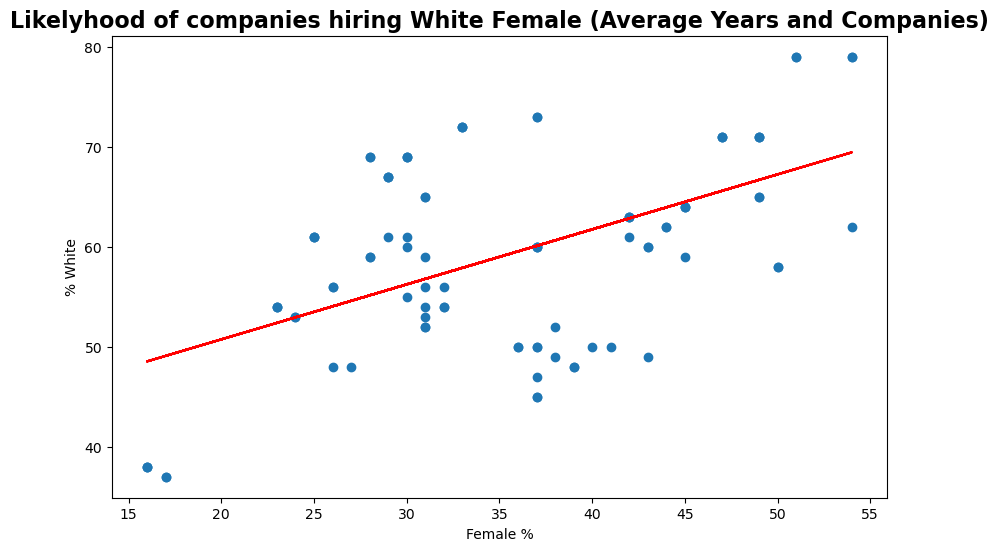

The r-value is: -0.3324449484504086


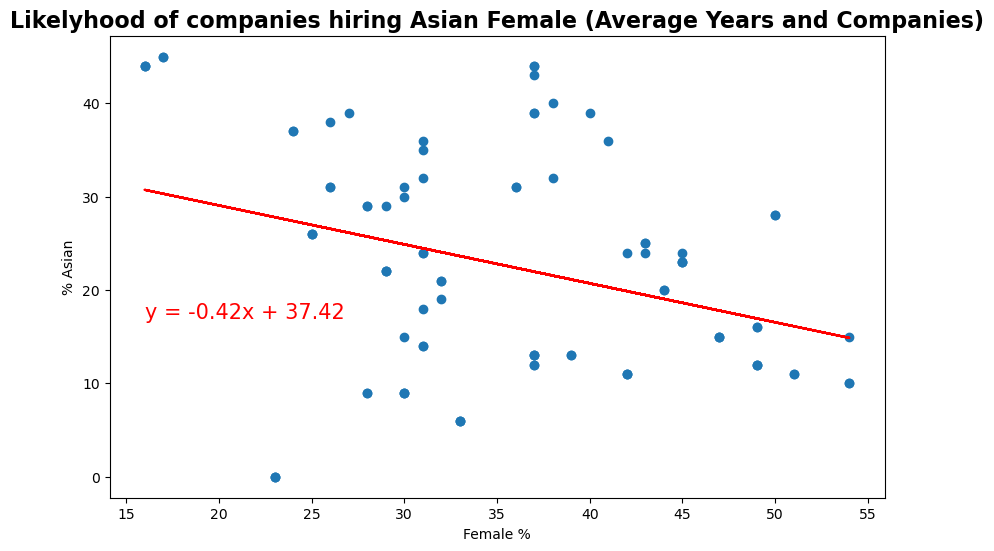

The r-value is: 0.12619415936237163


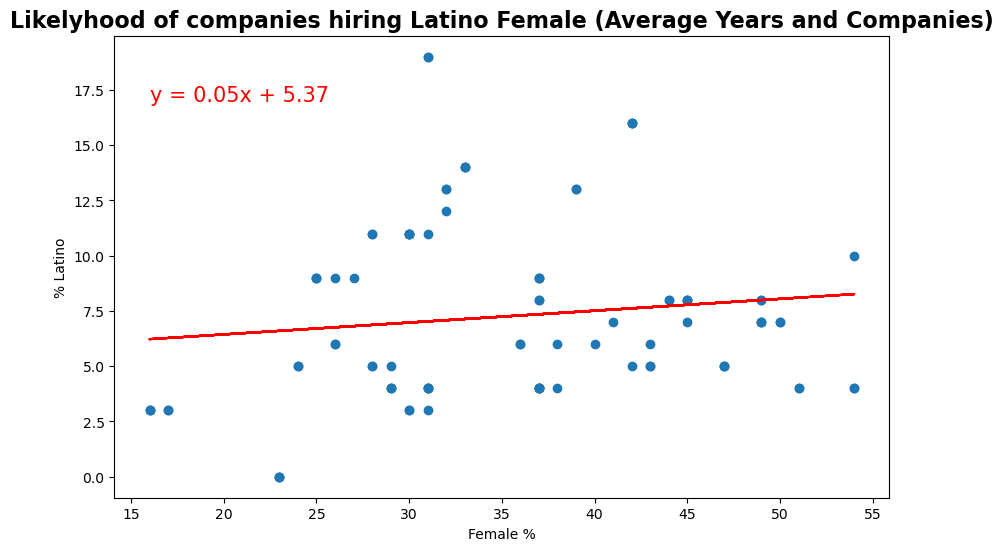

The r-value is: 0.129054411090084


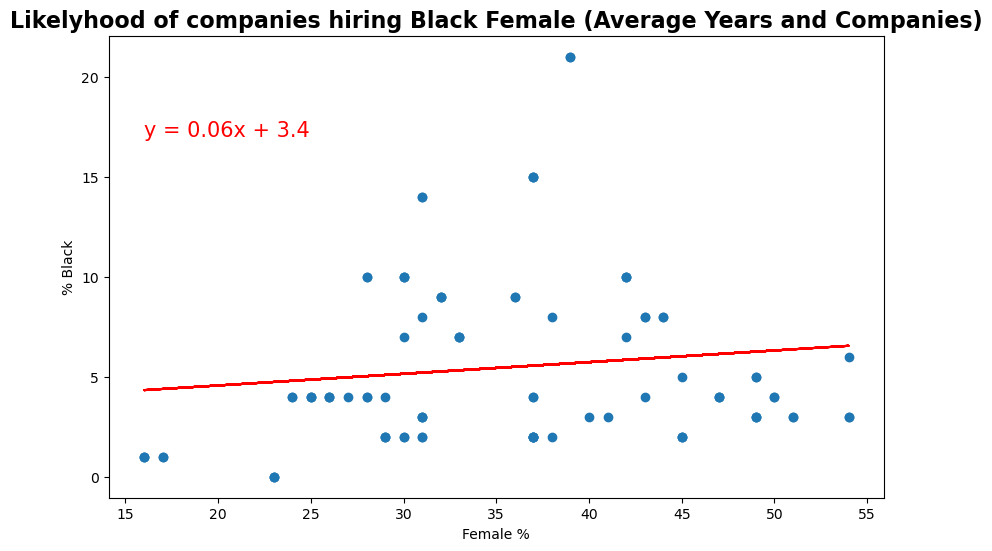

The r-value is: -0.2827638422658497


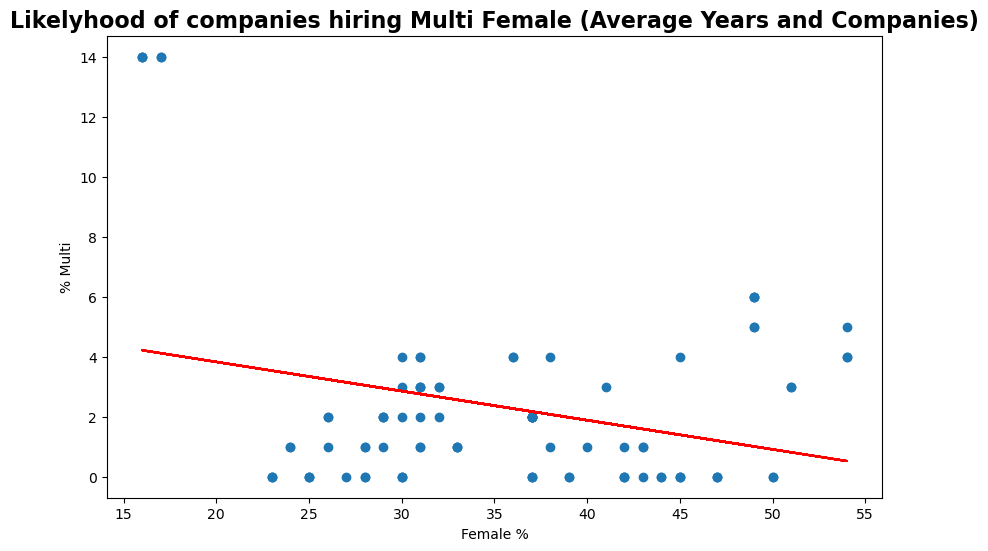

The r-value is: nan


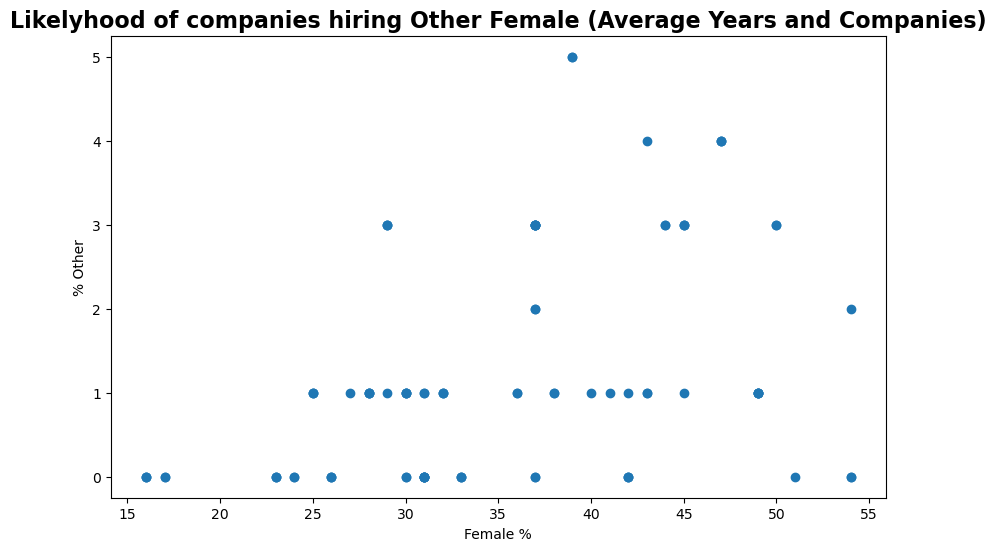

The r-value is: -0.008326365103854521


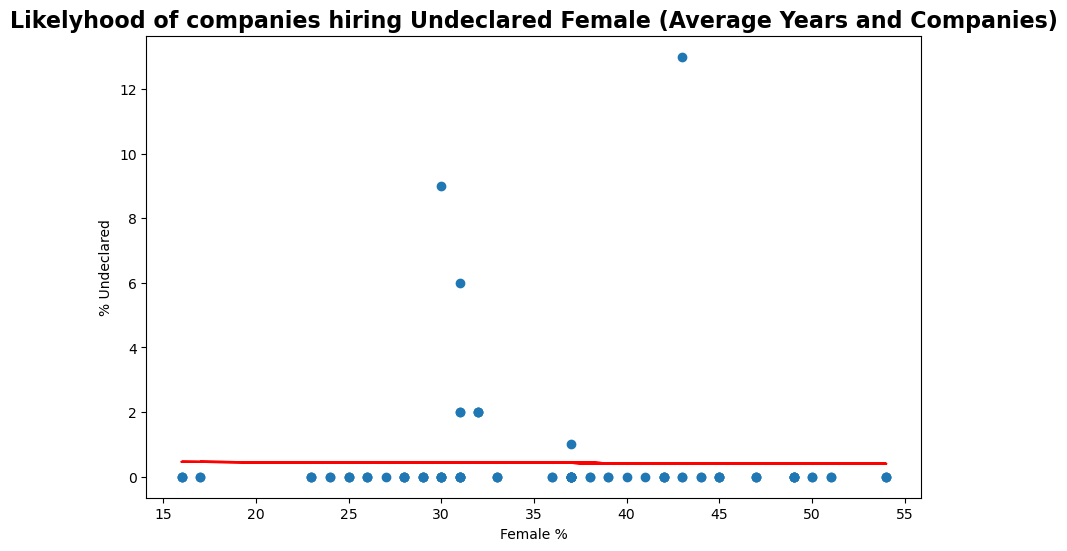

The r-value is: -0.5271368626470714


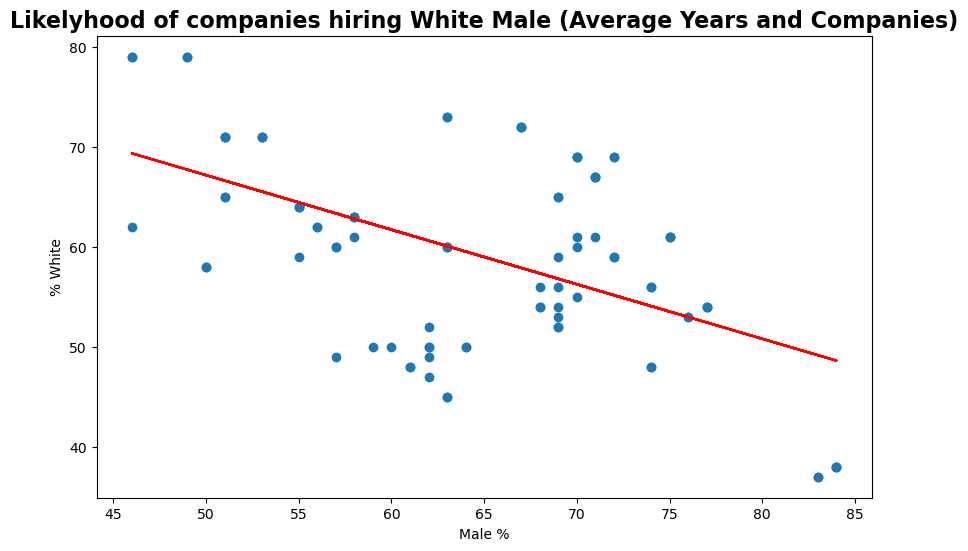

The r-value is: 0.3282784446223


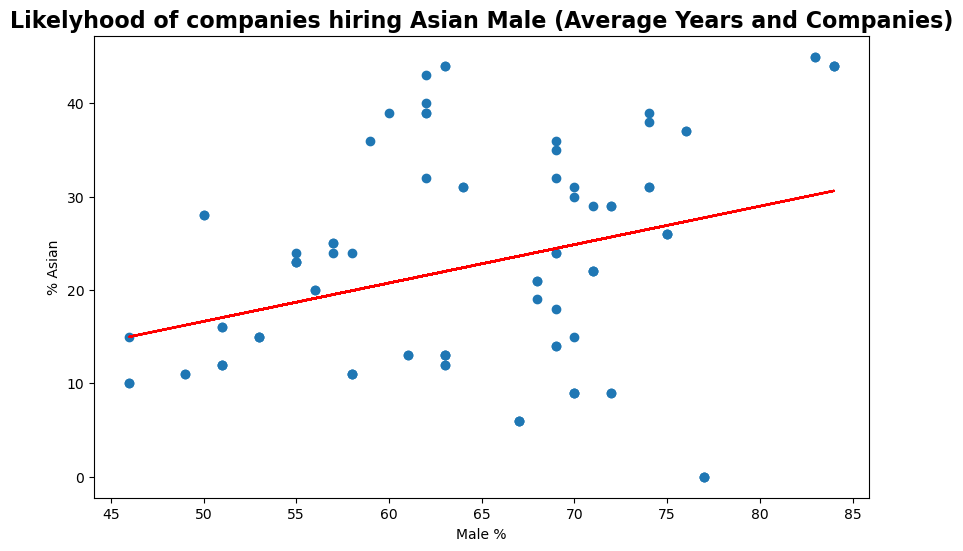

The r-value is: -0.12266358296281023


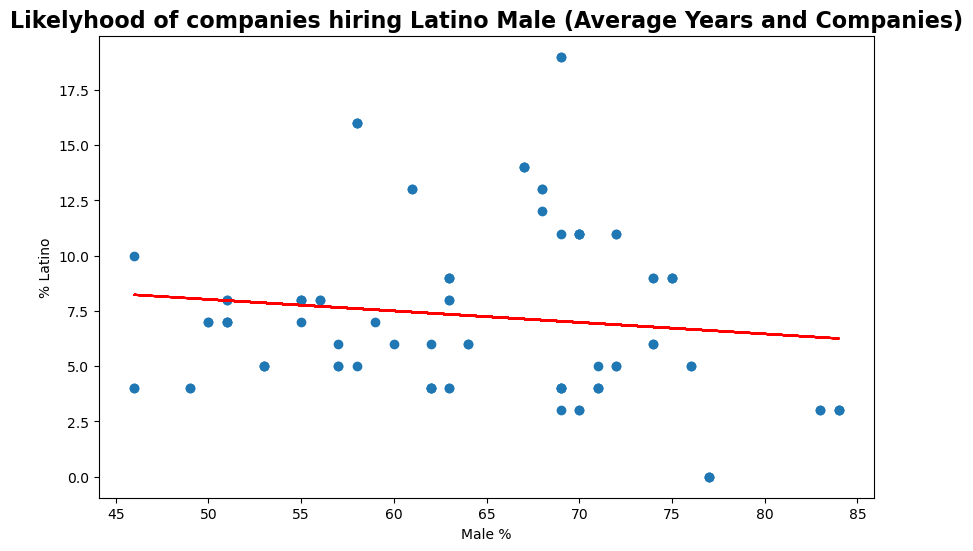

The r-value is: -0.12641674892350707


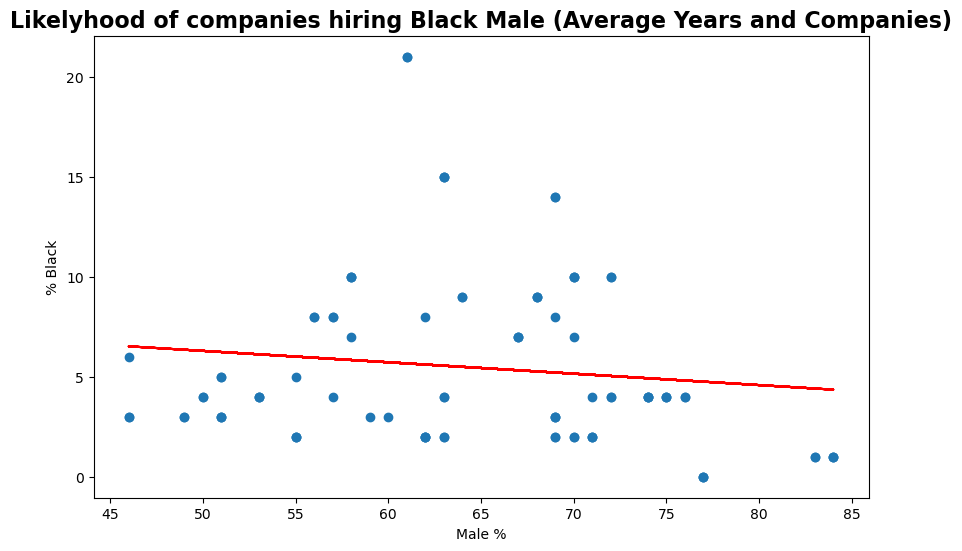

The r-value is: 0.2817691790773232


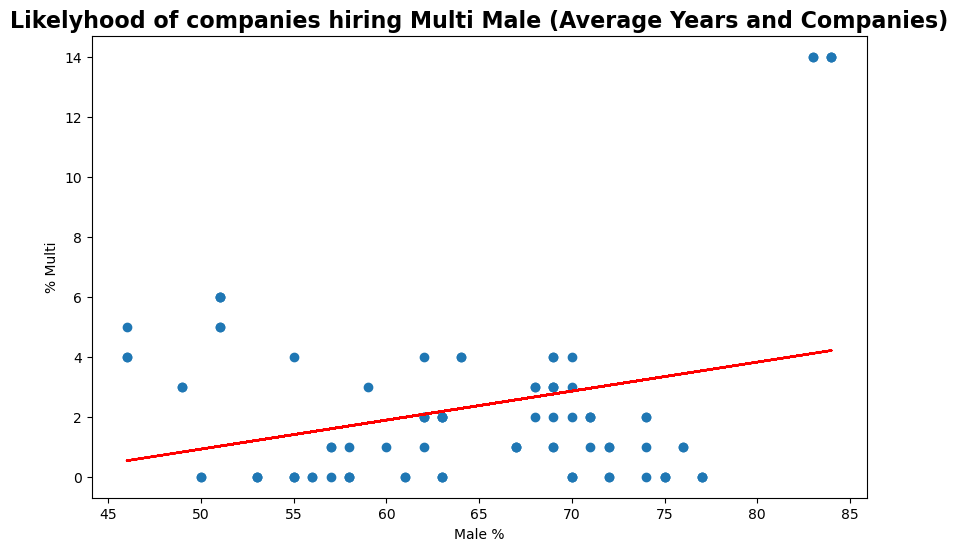

The r-value is: nan


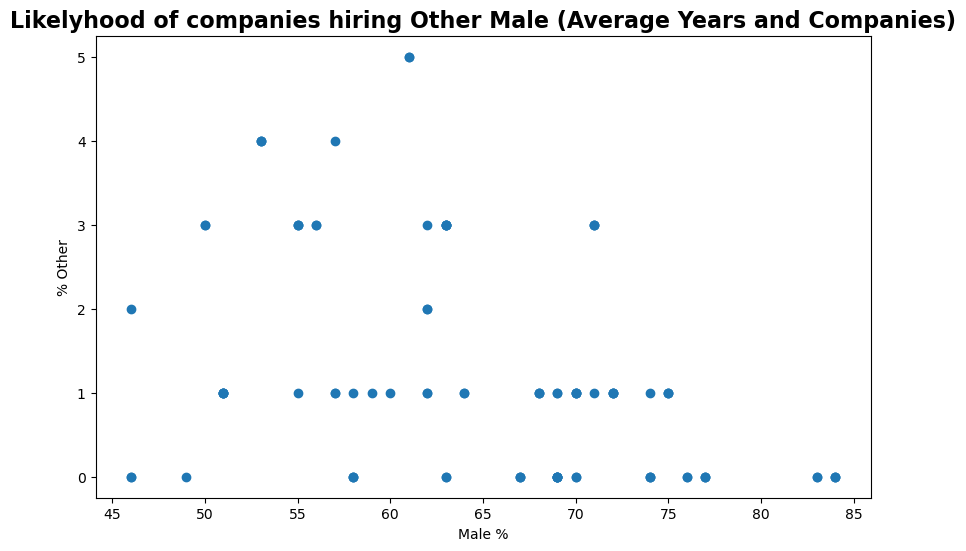

The r-value is: 0.008218690341416096


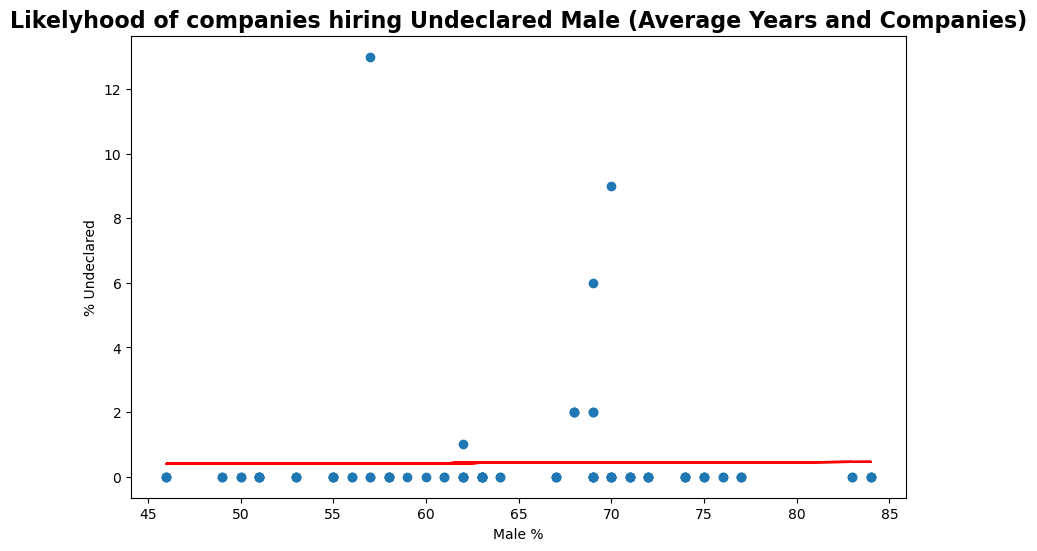

In [19]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Prepare the data
genders = ['Female', 'Male']
races = ['White', 'Asian', 'Latino', 'Black', 'Multi', 'Other', 'Undeclared']
coords = [[(40,40), (16,17), (16,17), (16,17), (12,40), (4,20), (10,40)],
          [(40,50), (50,0), (50,1), (50,17), (50,12), (4,70), (50,10)]]

# 2. Loop through genders 
for gender in genders:
    # Loop through races
    for race in races:
        plot_linear_regression(gender, race, 'Likelyhood of companies hiring Latino women (Average Years and Companies)', 'Female %', 'Latino %', (16,17))

The r-value is: 0.129054411090084


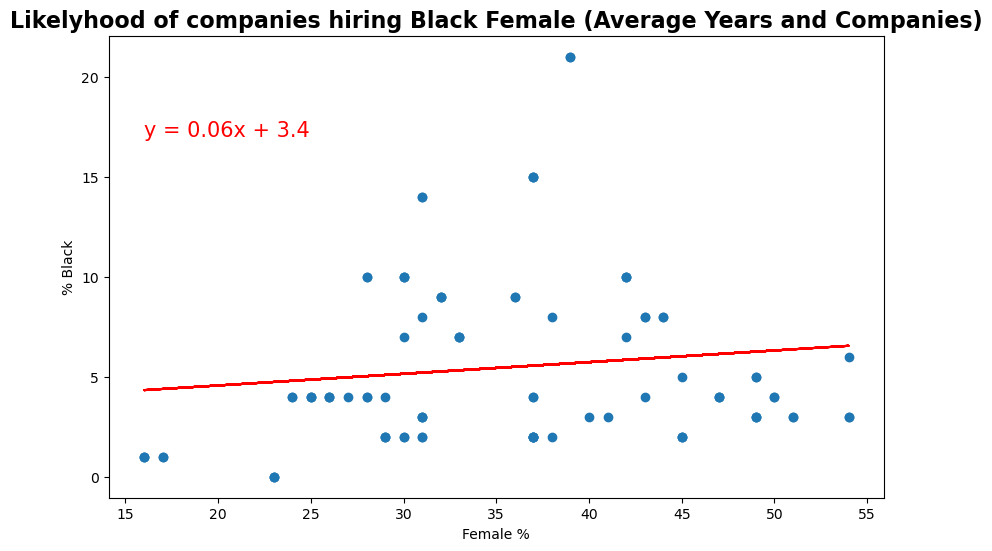

In [20]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Black'

plot_linear_regression(gender, race, f'Likelyhood of companies hiring {race} {gender} (Average Years and Companies)', f'{gender} %', f'{race} %', (16,17))

In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(gender, race, xlimits, ylimits, text_coordinates):
    
    # 1. Get the data
    x_values = df[f"{gender} %"]
    y_values = df[f"% {race}"]

    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 2. Make the canvas
    plt.figure(figsize=(10,6))

    # 3. Make the scatter plot
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.title(f'Likelyhood of companies hiring {race} {gender} (Average Years and Companies)', fontsize=16, fontweight='bold', color='black')
    plt.xlabel(f'{gender} %')
    plt.ylabel(f'% {race}')
    plt.xlim(xlimits)
    plt.ylim(ylimits)

    print(f"The r-value is: {rvalue}")

    # 4. Save/Show the plot
    plt.show()

The r-value is: 0.5303890671662571


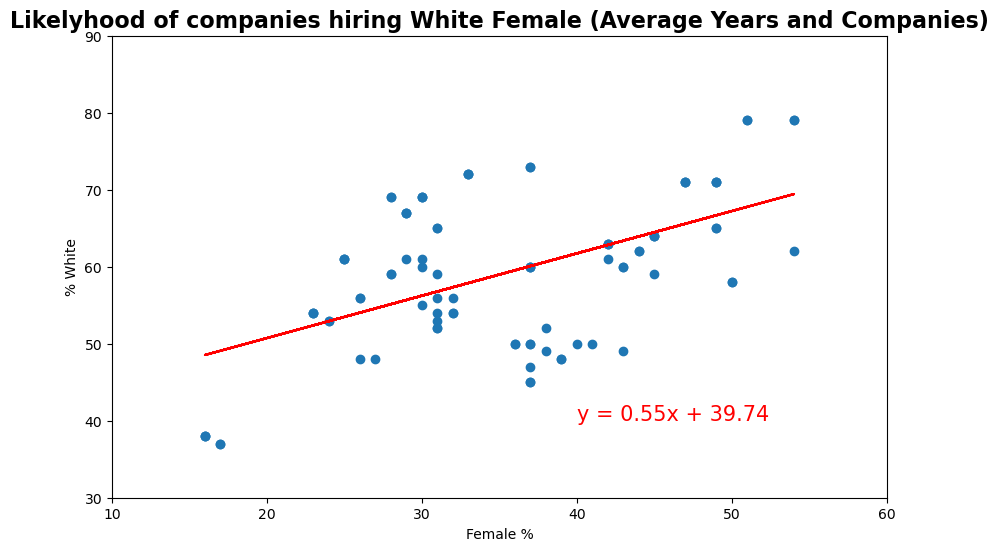

In [22]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'White'

plot_linear_regression(gender, race, (10,60), (30,90), (40,40))

The r-value is: -0.3324449484504086


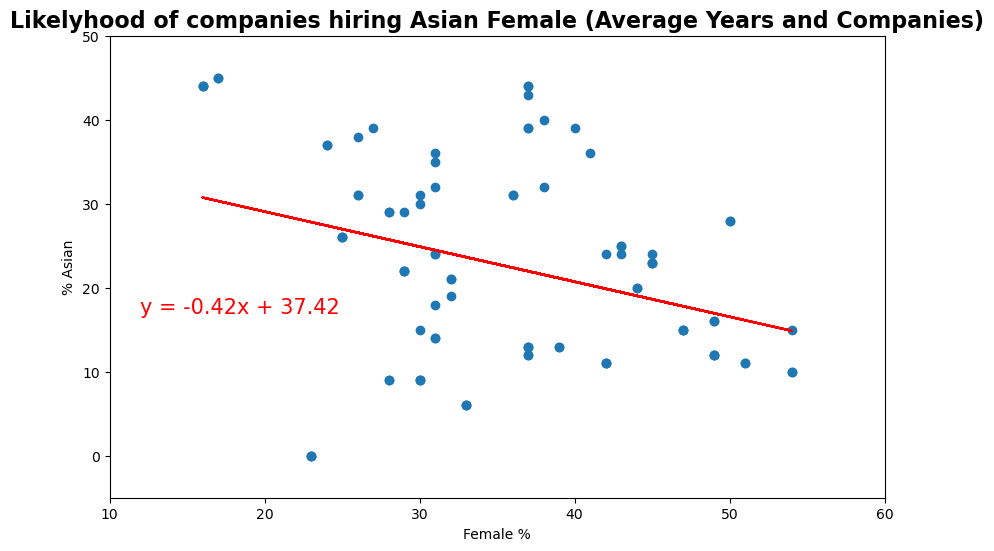

In [23]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Asian'

plot_linear_regression(gender, race, (10,60), (-5,50), (12,17))

The r-value is: 0.12619415936237163


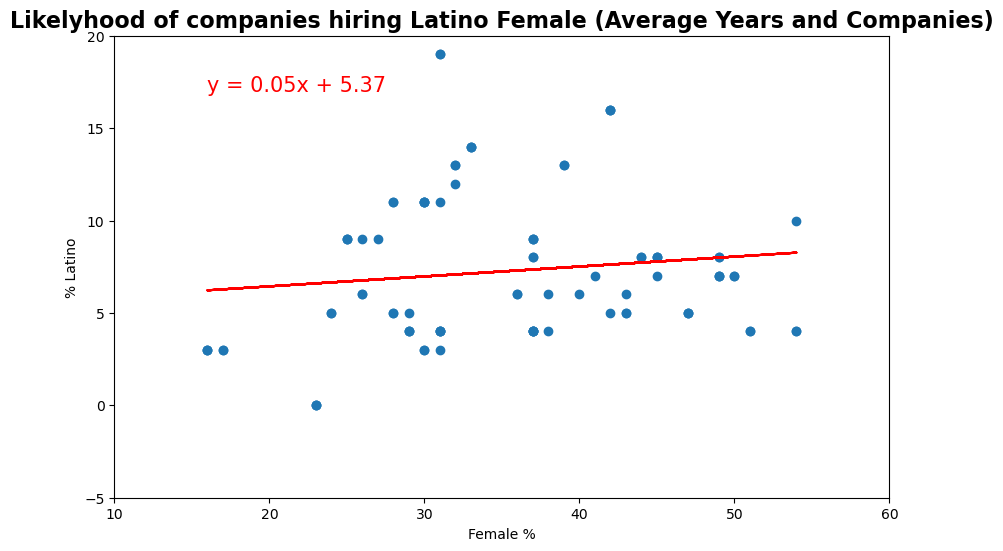

In [24]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Latino'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

The r-value is: 0.129054411090084


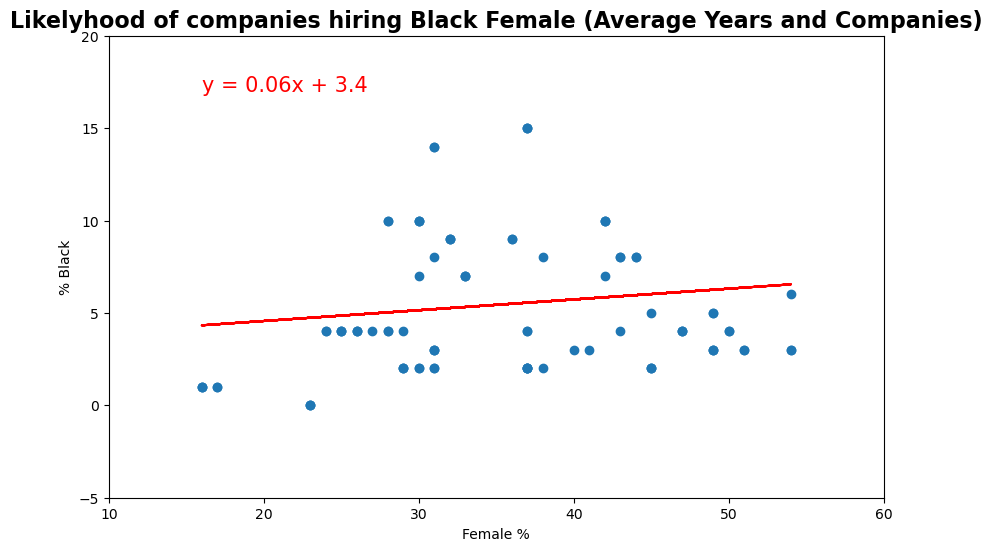

In [25]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Black'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

The r-value is: -0.2827638422658497


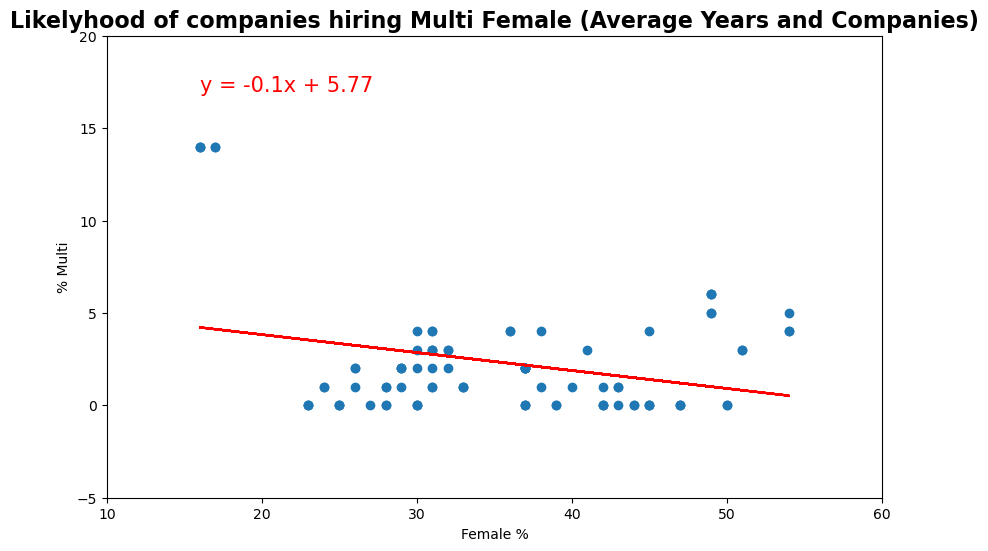

In [26]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Multi'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

The r-value is: nan


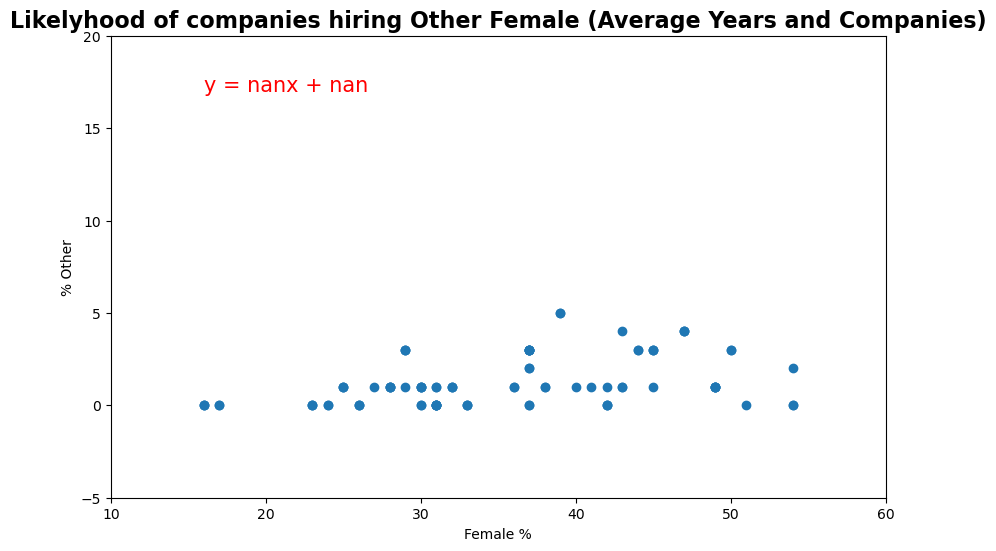

In [27]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Other'

plot_linear_regression(gender, race, (10,60), (-5,20), (16,17))

The r-value is: -0.008326365103854521


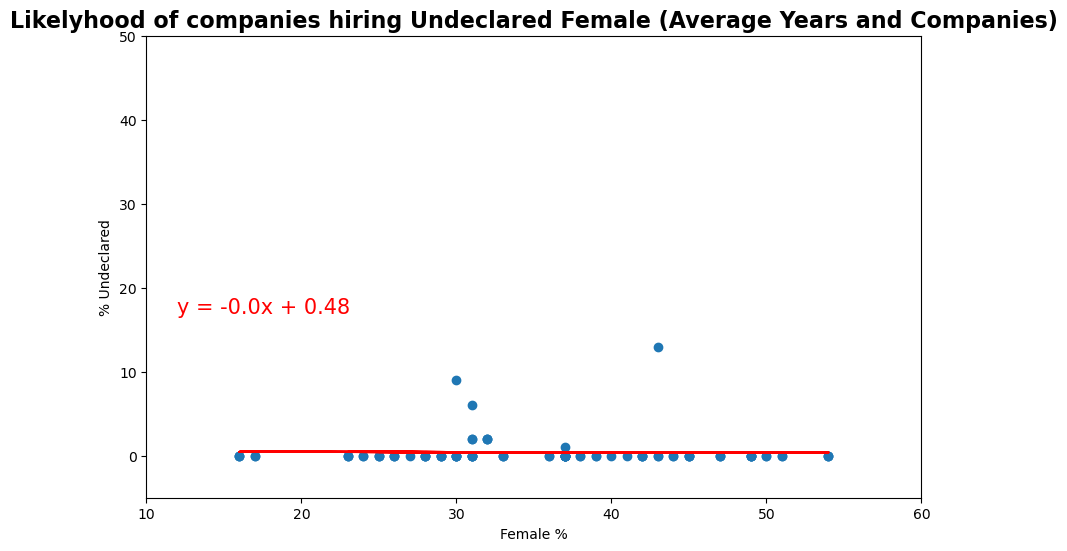

In [28]:
# Linear regression on Percentage of Females vs. Percentage of Latinos
# 1. Get the data
gender = 'Female'
race = 'Undeclared'

plot_linear_regression(gender, race, (10,60), (-5,50), (12,17))

In [29]:
genders = ['Female', 'Male']
races = ['White', 'Asian', 'Latino', 'Black', 'Multi', 'Other', 'Undeclared']
coords = [[(40,40), (16,17), (16,17), (16,17), (12,40), (4,20), (10,40)],
          [(40,50), (50,0), (50,1), (50,17), (50,12), (4,70), (50,10)]]

In [30]:
# only get the first 10 rows
df2 = df[0:10]
df2.head(20)

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [31]:
daniel_df = df.copy()
daniel_df

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2014,Groupon,47.0,53.0,71.0,15.0,5.0,4.0,0.0,4.0,0.0,100.0,99.0
90,2014,Amazon,37.0,63.0,60.0,13.0,9.0,15.0,0.0,3.0,0.0,100.0,100.0
91,2014,Salesforce,29.0,71.0,67.0,22.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
92,2014,Pandora,49.0,51.0,71.0,12.0,7.0,3.0,6.0,1.0,0.0,100.0,100.0


In [32]:
daniel_df.groupby(["Company","Year"])
average_male = daniel_df.groupby('Year')['Male %'].mean()

average_male_df = pd.DataFrame(average_male).reset_index()

average_male_df


,Year,Male %
0,2014,65.937500
1,2015,64.882353
2,2016,64.722222
3,2017,65.000000
4,2018,62.863636


In [33]:
average_female = daniel_df.groupby('Year')['Female %'].mean()

average_female_df = pd.DataFrame(average_female).reset_index()

average_female_df


,Year,Female %
0,2014,34.000000
1,2015,35.058824
2,2016,35.222222
3,2017,35.000000
4,2018,37.181818


In [34]:
average_merge = pd.merge(average_male_df, average_female_df, on ='Year').round()
average_merge

,Year,Male %,Female %
0,2014,66.0,34.0
1,2015,65.0,35.0
2,2016,65.0,35.0
3,2017,65.0,35.0
4,2018,63.0,37.0


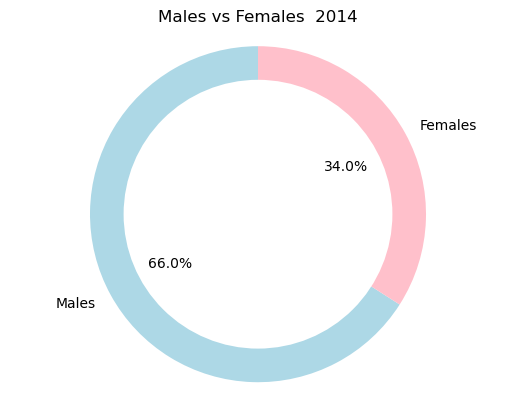

In [60]:
import matplotlib.pyplot as plt

# Data for males and females
labels = ['Males', 'Females']
sizes = [65.9, 34]  # percentages for males and females
colors = ['lightblue', 'pink']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.title('Males vs Females  2014')
plt.show()

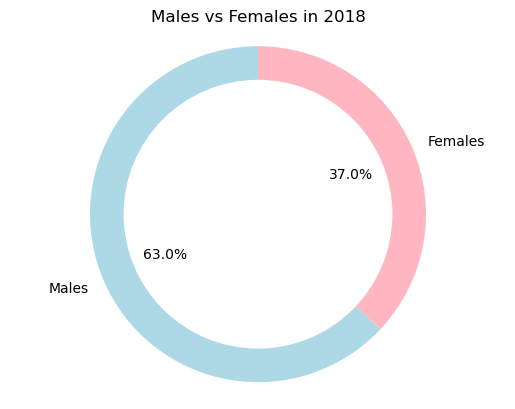

In [59]:
import matplotlib.pyplot as plt

# Data for males and females
labels = ['Males', 'Females']
sizes = [63, 37]  # percentages for males and females
colors = ['lightblue', 'lightpink']  # custom colors for males and females

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.title('Males vs Females in 2018')
plt.show()

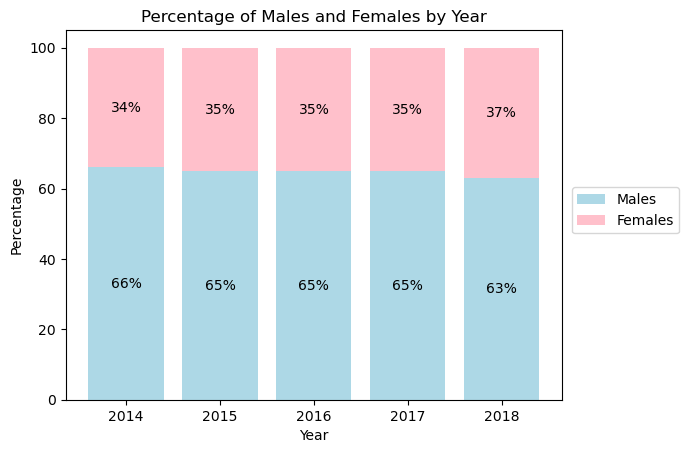

In [38]:
import matplotlib.pyplot as plt

# Data for the years 2014 and 2015
years = [2014, 2015, 2016, 2017, 2018]
males_percent = [66, 65, 65, 65, 63]
females_percent = [34, 35, 35, 35, 37]

# Create a bar chart
plt.bar(years, males_percent, color='lightblue', label='Males')
plt.bar(years, females_percent, color='pink', bottom=males_percent, label='Females')

# Add labels for the percentages
for i, year in enumerate(years):
    plt.text(year, males_percent[i] / 2, f"{males_percent[i]}%", ha='center', va='center', color='black')
    plt.text(year, males_percent[i] + females_percent[i] / 2, f"{females_percent[i]}%", ha='center', va='center', color='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Males and Females by Year')
plt.xticks(years)
plt.legend(loc = (1.02, 0.45))

# Show the plot
plt.show()


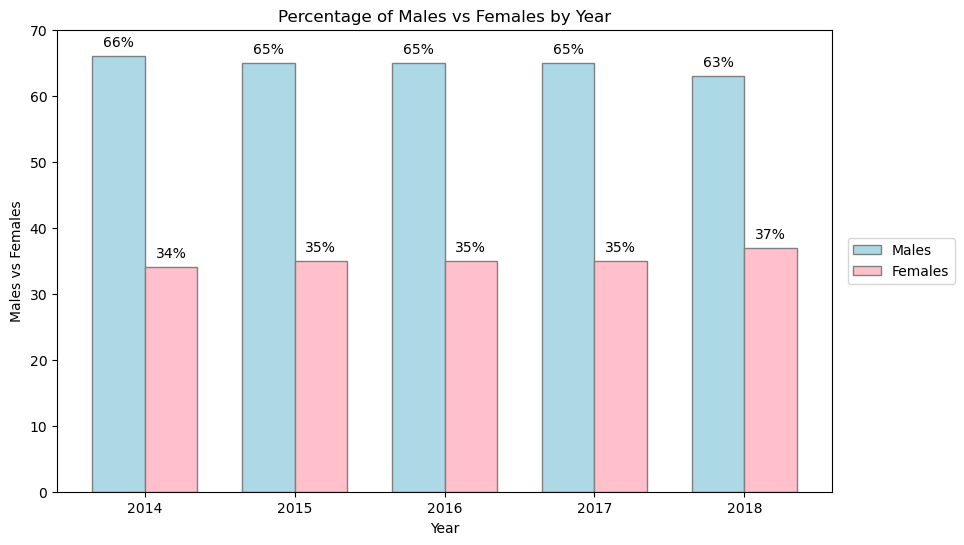

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the years 2014 and 2015
years = [2014, 2015, 2016, 2017, 2018]
males_percent = [66, 65, 65, 65, 63]
females_percent = [34, 35, 35, 35, 37]

# Set the width of the bars
bar_width = 0.35
plt.figure(figsize=(10, 6))

# Set the position of the bars on the x-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Create a bar chart with bars next to each other
plt.bar(r1, males_percent, color='lightblue', width=bar_width, edgecolor='grey', label='Males')
plt.bar(r2, females_percent, color='pink', width=bar_width, edgecolor='grey', label='Females')

# Add labels for the percentages
for i in range(len(years)):
    plt.text(r1[i], males_percent[i] + 1, f"{males_percent[i]}%", ha='center', va='bottom', color='black')
    plt.text(r2[i], females_percent[i] + 1, f"{females_percent[i]}%", ha='center', va='bottom', color='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Males vs Females')
plt.title('Percentage of Males vs Females by Year')
plt.xticks([r + bar_width/2 for r in range(len(years))], years)
plt.legend(loc = (1.02, 0.45))
plt.ylim(0, 70)


# Show the plot
plt.show()

In [40]:
males_average = average_merge["Male %"].mean()
males_average

64.8

In [41]:
females_average = average_merge["Female %"].mean()
females_average

35.2

In [42]:
data = {
    "Male %": [males_average],
    "Female %": [females_average]
    }

total_df = pd.DataFrame(data).round()

total_df

,Male %,Female %
0,65.0,35.0


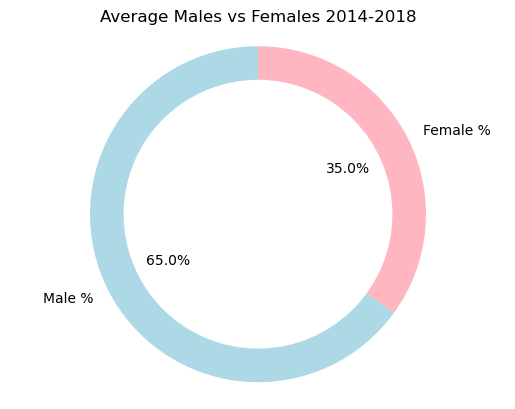

In [43]:
# Data for males and females
labels = ['Male %', 'Female %']
sizes = [65, 35]  # percentages for males and females
colors = ['lightblue', 'lightpink']  # custom colors for males and females

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.title('Average Males vs Females 2014-2018')
plt.show()

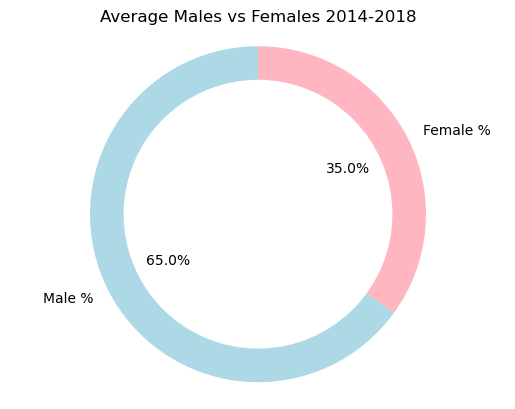

In [44]:
# Data for males and females
labels = ['Male %', 'Female %']
sizes = [65, 35]  # percentages for males and females
colors = ['lightblue', 'lightpink']  # custom colors for males and females

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.title('Average Males vs Females 2014-2018')
plt.show()

In [45]:
average_merge

,Year,Male %,Female %
0,2014,66.0,34.0
1,2015,65.0,35.0
2,2016,65.0,35.0
3,2017,65.0,35.0
4,2018,63.0,37.0


In [46]:
average_merge

,Year,Male %,Female %
0,2014,66.0,34.0
1,2015,65.0,35.0
2,2016,65.0,35.0
3,2017,65.0,35.0
4,2018,63.0,37.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


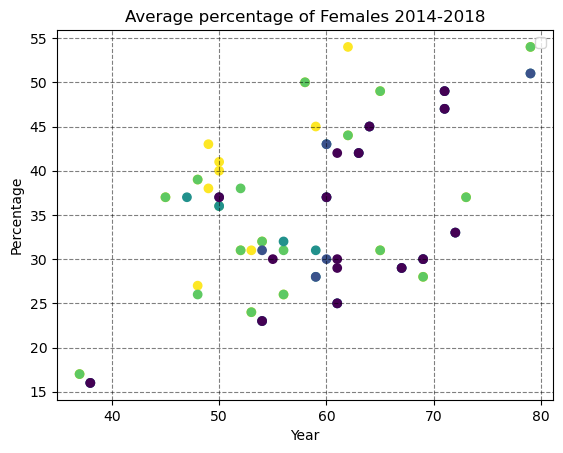

In [67]:
x = df['% White']
y = df['Female %']

plt.scatter(x, y, c = df['Year'])
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Average percentage of Females 2014-2018')
plt.grid(linestyle='--', alpha=0.5, color='black')
plt.legend()
#plt.ylim(30, 90)
#plt.xlim(10,60)
plt.show()

In [49]:
daniel_df.head

<bound method NDFrame.head of     Year     Company  Female %  Male %  % White  % Asian  % Latino  % Black  \
0   2018      Yahoo!      37.0    63.0     45.0     44.0       4.0      2.0   
1   2018      Google      31.0    69.0     53.0     36.0       4.0      3.0   
2   2018       Apple      32.0    68.0     54.0     21.0      13.0      9.0   
3   2018       Cisco      24.0    76.0     53.0     37.0       5.0      4.0   
4   2018        eBay      40.0    60.0     50.0     39.0       6.0      3.0   
..   ...         ...       ...     ...      ...      ...       ...      ...   
89  2014     Groupon      47.0    53.0     71.0     15.0       5.0      4.0   
90  2014      Amazon      37.0    63.0     60.0     13.0       9.0     15.0   
91  2014  Salesforce      29.0    71.0     67.0     22.0       4.0      2.0   
92  2014     Pandora      49.0    51.0     71.0     12.0       7.0      3.0   
93  2014   Microsoft      29.0    71.0     61.0     29.0       5.0      4.0   

    % Multi  % Other 

In [50]:
daniel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               91 non-null     int64  
 1   Company            91 non-null     object 
 2   Female %           91 non-null     float64
 3   Male %             91 non-null     float64
 4   % White            91 non-null     float64
 5   % Asian            91 non-null     float64
 6   % Latino           91 non-null     float64
 7   % Black            91 non-null     float64
 8   % Multi            91 non-null     float64
 9   % Other            90 non-null     float64
 10  % Undeclared       91 non-null     float64
 11  Gender Total %     91 non-null     float64
 12  Diversity Total %  90 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.0+ KB


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 93
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               91 non-null     int64  
 1   Company            91 non-null     object 
 2   Female %           91 non-null     float64
 3   Male %             91 non-null     float64
 4   % White            91 non-null     float64
 5   % Asian            91 non-null     float64
 6   % Latino           91 non-null     float64
 7   % Black            91 non-null     float64
 8   % Multi            91 non-null     float64
 9   % Other            90 non-null     float64
 10  % Undeclared       91 non-null     float64
 11  Gender Total %     91 non-null     float64
 12  Diversity Total %  90 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 10.0+ KB


In [52]:
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0


In [53]:
df14 = df.loc[df['Year'] == 2014]
df14

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
77,2014,Yahoo!,37.0,62.0,50.0,39.0,4.0,2.0,2.0,2.0,0.0,99.0,99.0
78,2014,Google,30.0,70.0,61.0,30.0,3.0,2.0,4.0,0.0,0.0,100.0,100.0
79,2014,Apple,30.0,70.0,55.0,15.0,11.0,7.0,2.0,1.0,9.0,100.0,100.0
81,2014,Cisco,23.0,77.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,54.0
82,2014,eBay,42.0,58.0,61.0,24.0,5.0,7.0,1.0,1.0,0.0,100.0,99.0
83,2014,HP,33.0,67.0,72.0,6.0,14.0,7.0,1.0,0.0,0.0,100.0,100.0
84,2014,Indiegogo,45.0,55.0,64.0,23.0,8.0,2.0,0.0,3.0,0.0,100.0,100.0
85,2014,Nvidia,16.0,84.0,38.0,44.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
86,2014,Dell,30.0,70.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
87,2014,Ingram Micro,42.0,58.0,63.0,11.0,16.0,10.0,0.0,0.0,0.0,100.0,100.0


In [54]:
df15 = df.loc[df['Year'] == 2015]
df15

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
59,2015,Yahoo!,37.0,62.0,50.0,39.0,4.0,2.0,2.0,2.0,1.0,99.0,100.0
60,2015,Google,30.0,70.0,60.0,31.0,3.0,2.0,3.0,0.0,0.0,100.0,99.0
61,2015,Apple,31.0,69.0,54.0,18.0,11.0,8.0,2.0,1.0,6.0,100.0,100.0
63,2015,Cisco,23.0,77.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,54.0
64,2015,eBay,43.0,57.0,60.0,25.0,5.0,8.0,1.0,1.0,0.0,100.0,100.0
65,2015,HP,33.0,67.0,72.0,6.0,14.0,7.0,1.0,0.0,0.0,100.0,100.0
66,2015,Indiegogo,45.0,55.0,64.0,23.0,8.0,2.0,0.0,3.0,0.0,100.0,100.0
67,2015,Nvidia,16.0,84.0,38.0,44.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
68,2015,Dell,30.0,70.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
69,2015,Ingram Micro,42.0,58.0,63.0,11.0,16.0,10.0,0.0,0.0,0.0,100.0,100.0


In [55]:
df16 = df.loc[df['Year'] == 2016]

In [56]:
df17 = df.loc[df['Year'] == 2017]

In [57]:
df18 = df.loc[df['Year'] == 2018]

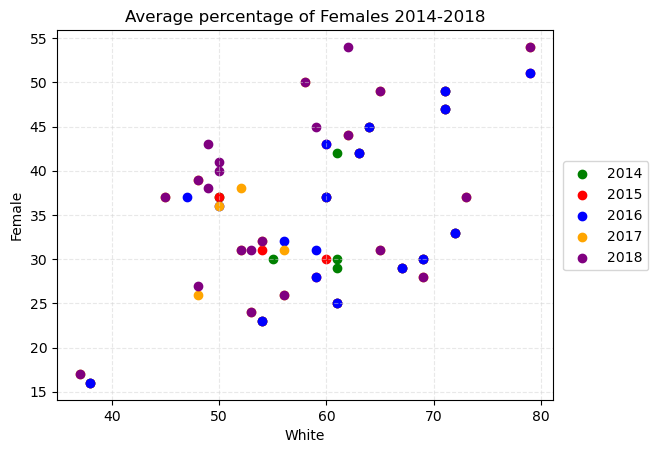

In [58]:


#plt.scatter(x, y, c = df15['Year'])
plt.scatter(df14['% White'], df14['Female %'], c = 'green')
plt.scatter(df15['% White'], df15['Female %'], c = 'red')
plt.scatter(df16['% White'], df16['Female %'], c = 'blue')
plt.scatter(df17['% White'], df17['Female %'], c = 'orange')
plt.scatter(df18['% White'], df18['Female %'], c = 'purple')
plt.xlabel('White')
plt.ylabel('Female')
plt.title('Average percentage of Females 2014-2018')
plt.grid(linestyle='--', alpha=0.5, color='lightgray')
plt.legend([2014, 2015, 2016, 2017, 2018], loc = (1.02, 0.35))
#plt.ylim(30, 90)
#plt.xlim(10,60)
plt.show()